# PAT 2
Instructions

· You need to submit the source code along with output (if colab ipynb file; else a separate .py file and output on this word document)

· Your file name should be named as 20BRS1001.py or (20BRS1001.ipynb)

· You cannot refer any resources on the net

· You may refer supporting documents for additional details

You need to build a decision tree classifier for the given dataset Nephritis which is used for predicting whether a person is affected by Nephritis of renal pelvis origin based on the following features: Temperature of patient, Occurrence of nausea, Lumbar pain, Continuous need for urination, Micturition pains and Burning.

A. Exploratory analysis of the dataset (15 marks)

         i.    Print number of samples and features in the dataset (2)

         ii.    Print all the feature names (2)

         iii.   Find the distribution of the classes and plot it (2)

         iv.  Write a function to find the Information gain of the attribute Nausea. Print the result. (5)

         v.   The attribute Temperature is continuous valued attribute. How will you find the entropy of this attribute? If you make any assumptions clearly mention here and print the entropy of the Temperature attribute.  (hint : discretize the values) (4)
B. Decision-tree model (15 marks)

        i.   Split the dataset into training and testing (80% and 20%) (2)

        ii.   Use the appropriate scikit-learn model for building the decision tree using the training dataset and print the trained model parameters. (4)

                a.  Test the model with test dataset. (3)

                b.  Print the confusion matrix. (3)

                c.  Try to change the following hyper-parameters of the decision tree model and report the change in the accuracy (3)

                     i.      Splitting Criterion from entropy to gini

                     ii.      max_depth

                     iii.      min_samples_leaf

In [202]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [203]:
col_names = ['Temperature','Nausea','Lumbar pain','Continous_need','Micturition pains','Burning','Nephritis']
dataset = pd.read_csv("Nephritis2.csv", header=None, names=col_names)
print(dataset.head(5))

   Temperature Nausea Lumbar pain Continous_need Micturition pains Burning  \
0         35.5     no         yes             no                no      no   
1         35.9     no          no            yes               yes     yes   
2         35.9     no         yes             no                no      no   
3         36.0     no          no            yes               yes     yes   
4         36.0     no         yes             no                no      no   

  Nephritis  
0        no  
1        no  
2        no  
3        no  
4        no  


#### String to encoded values

In [204]:
replacement = pd.get_dummies(dataset['Nephritis'])
replaced = pd.concat([dataset, replacement], axis = 1)
dataset = replaced.drop(['Nephritis', 'no'], axis = 1)
dataset.rename(columns = {'yes':'Nephritis'}, inplace = True)

In [205]:
replacement = pd.get_dummies(dataset.Nausea)
replaced = pd.concat([dataset, replacement], axis = 1)
dataset = replaced.drop(['Nausea', 'no'], axis = 1)
dataset.rename(columns = {'yes':'Nausea'}, inplace = True)

In [206]:
replacement = pd.get_dummies(dataset['Lumbar pain'])
replaced = pd.concat([dataset, replacement], axis = 1)
dataset = replaced.drop(['Lumbar pain', 'no'], axis = 1)
dataset.rename(columns = {'yes':'Lumbar pain'}, inplace = True)

In [207]:
replacement = pd.get_dummies(dataset['Continous_need'])
replaced = pd.concat([dataset, replacement], axis = 1)
dataset = replaced.drop(['Continous_need', 'no'], axis = 1)
dataset.rename(columns = {'yes':'Continous_need'}, inplace = True)

In [208]:
replacement = pd.get_dummies(dataset['Micturition pains'])
replaced = pd.concat([dataset, replacement], axis = 1)
dataset = replaced.drop(['Micturition pains', 'no'], axis = 1)
dataset.rename(columns = {'yes':'Micturition pains'}, inplace = True)

In [209]:
replacement = pd.get_dummies(dataset['Burning'])
replaced = pd.concat([dataset, replacement], axis = 1)
dataset = replaced.drop(['Burning', 'no'], axis = 1)
dataset.rename(columns = {'yes':'Burning'}, inplace = True)

In [210]:
print(dataset)

     Temperature  Nephritis  Nausea  Lumbar pain  Continous_need  \
0           35.5          0       0            1               0   
1           35.9          0       0            0               1   
2           35.9          0       0            1               0   
3           36.0          0       0            0               1   
4           36.0          0       0            1               0   
..           ...        ...     ...          ...             ...   
115         41.4          1       0            1               1   
116         41.5          0       0            0               0   
117         41.5          1       1            1               0   
118         41.5          1       0            1               1   
119         41.5          1       0            1               1   

     Micturition pains  Burning  
0                    0        0  
1                    1        1  
2                    0        0  
3                    1        1  
4            

## A. Exploratory analysis of the dataset (15 marks)

   ###  i.    Print number of samples and features in the dataset

In [211]:
print('No of rows:',dataset.shape[0])
print('No of columns:',dataset.shape[1])
print('No of features:',dataset.shape[1] - 1)

No of rows: 120
No of columns: 7
No of features: 6


### ii.    Print all the feature names

In [212]:
dataset.columns

Index(['Temperature', 'Nephritis', 'Nausea', 'Lumbar pain', 'Continous_need',
       'Micturition pains', 'Burning'],
      dtype='object')

### iii. Find the distribution of the classes and plot it 

50
70


Text(0, 0.5, 'Number')

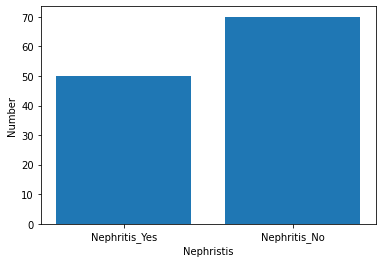

In [185]:
import matplotlib.pyplot as plt
Nephritis = dataset.groupby('Nephritis').size()
neph_Y=Nephritis[1]
print(neph_Y)
neph_N=Nephritis [0]
print(neph_N)
x=["Nephritis_Yes","Nephritis_No"]
y=[neph_Y,neph_N]
plt.bar(x,y)
plt.xlabel("Nephristis")
plt.ylabel("Number")

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Nausea'}>,
        <AxesSubplot:title={'center':'Lumbar pain'}>],
       [<AxesSubplot:title={'center':'Continous_need'}>,
        <AxesSubplot:title={'center':'Micturition pains'}>,
        <AxesSubplot:title={'center':'Burning'}>],
       [<AxesSubplot:title={'center':'Nephritis'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

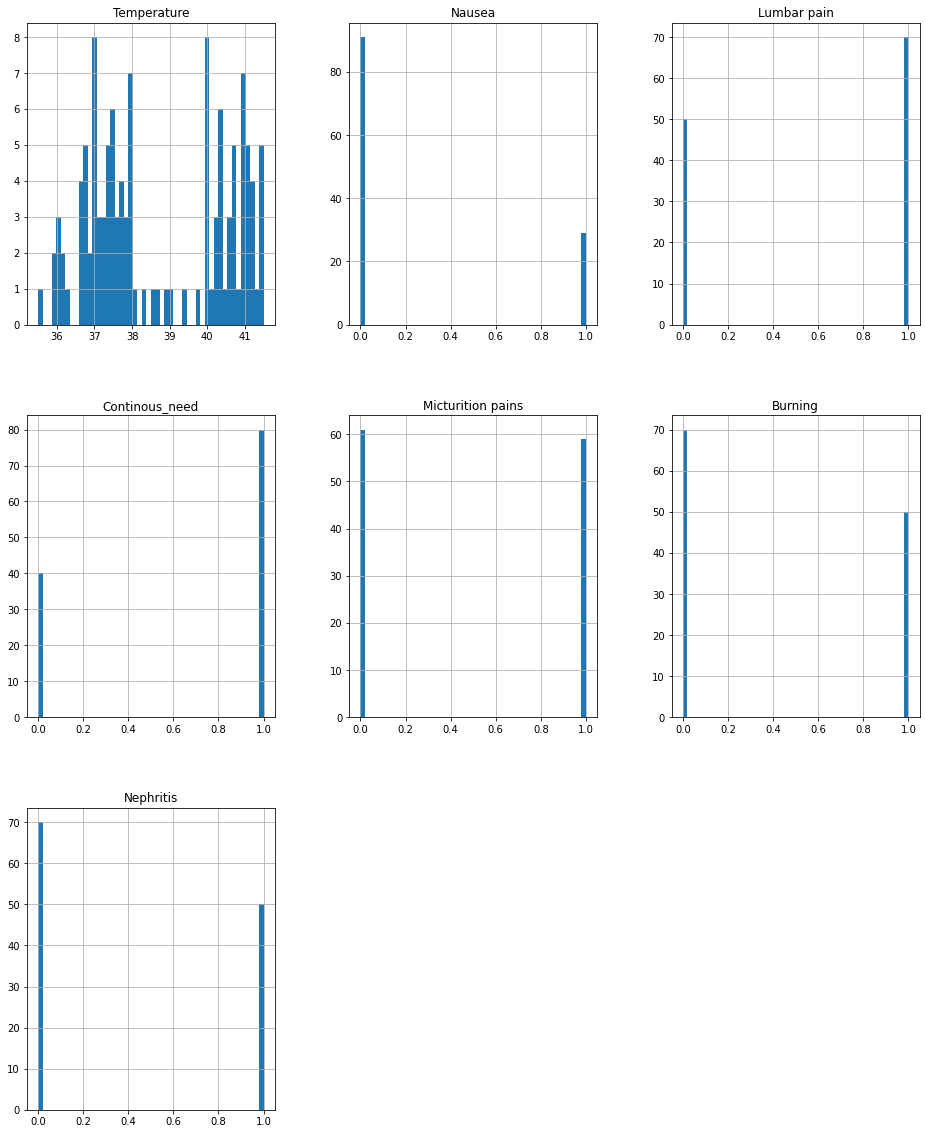

In [186]:
dataset_num = dataset[['Temperature','Nausea','Lumbar pain','Continous_need','Micturition pains','Burning','Nephritis']]
dataset_num.hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10)

### iv.  Write a function to find the Information gain of the attribute Nausea. Print the result.

In [187]:
def calc_total_entropy(train_data, label, class_list):
    total_row = train_data.shape[0] #the total size of the dataset
    total_entr = 0
    
    for c in class_list: # for each class in the label
        total_class_count = train_data[train_data[label] == c].shape[0] #number of the class
        total_class_entr = - (total_class_count/total_row)*np.log2((total_class_count/total_row) + 0.00001) #entropy of the class
        total_entr += total_class_entr #adding the class entropy to the total entropy of the dataset        
    # print("Entropy before splitting ")
    print(total_entr)
    return total_entr

def calc_entropy(feature_value_data, label, class_list):
    class_count = feature_value_data.shape[0]
    entropy = 0
    
    for c in class_list:
        label_class_count = feature_value_data[feature_value_data[label] == c].shape[0] #row count of class c 
        
        entropy_class = 0
        if label_class_count != 0:
            probability_class = label_class_count/class_count #probability of the class
            entropy_class = - probability_class * np.log2(probability_class  + 0.00001)  #entropy
        entropy += entropy_class
    return entropy

def calc_info_gain(feature_name, train_data, label, class_list):
    feature_value_list = train_data[feature_name].unique() #unqiue values of the feature
    total_row = train_data.shape[0]
    feature_info = 0.0
    
    for feature_value in feature_value_list: #all possible values of a feature
        feature_value_data = train_data[train_data[feature_name] == feature_value] #filtering rows with that feature_value
        feature_value_count = feature_value_data.shape[0]
        feature_value_entropy = calc_entropy(feature_value_data, label, class_list) #calculcating entropy for the feature value
        feature_value_probability = feature_value_count/total_row
        feature_info += feature_value_probability * feature_value_entropy #calculating information of the feature value
        print("Info gain: ", calc_total_entropy(train_data, label, class_list) - feature_info) #calculating information gain by subtracting

calc_info_gain('Nausea', dataset, 'Nephritis', col_names)


0.0
Info gain:  0.0
0.0
Info gain:  0.0


### v. The attribute Temperature is continuous valued attribute. How will you find the entropy of this attribute? If you make any assumptions clearly mention here and print the entropy of the Temperature attribute. (hint : discretize the values)

In [213]:
""" 
    
    Discretizing values of Temperature
    
"""

feature_cols = ['Temperature']

X = dt[feature_cols] # Features
y = dt.Nephritis # Target variable
# print("X\n", X)
feature_array = ohe.fit_transform(dt[['Temperature']])
feature_labels = ohe.categories_
print(feature_labels)
# Creating final dataframe
cols = [35.5, 35.9, 36. , 36.2, 36.3, 36.6, 36.7, 36.8, 36.9, 37. , 37.1,
       37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38. , 38.1, 38.3,
       38.5, 38.7, 38.9, 39. , 39.4, 39.7, 40. , 40.1, 40.2, 40.3, 40.4,
       40.5, 40.6, 40.7, 40.8, 40.9, 41. , 41.1, 41.2, 41.3, 41.4, 41.5]
dt2 = pd.DataFrame(feature_array, columns = cols)
dt3 = pd.concat([dataset['Nephritis'], dt2], axis = 1)
print("\n\nTemperature discrete values\n",dt3)
cols_name = ['Nephritis', 35.5, 35.9, 36. , 36.2, 36.3, 36.6, 36.7, 36.8, 36.9, 37. , 37.1,
       37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38. , 38.1, 38.3,
       38.5, 38.7, 38.9, 39. , 39.4, 39.7, 40. , 40.1, 40.2, 40.3, 40.4,
       40.5, 40.6, 40.7, 40.8, 40.9, 41. , 41.1, 41.2, 41.3, 41.4, 41.5]
calc_info_gain(cols, dt3, 'Nephritis', cols_name)

[array([35.5, 35.9, 36. , 36.2, 36.3, 36.6, 36.7, 36.8, 36.9, 37. , 37.1,
       37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38. , 38.1, 38.3,
       38.5, 38.7, 38.9, 39. , 39.4, 39.7, 40. , 40.1, 40.2, 40.3, 40.4,
       40.5, 40.6, 40.7, 40.8, 40.9, 41. , 41.1, 41.2, 41.3, 41.4, 41.5])]


Temperature discrete values
      Nephritis  35.5  35.9  36.0  36.2  36.3  36.6  36.7  36.8  36.9  ...  \
0            0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1            0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2            0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3            0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4            0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
..         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
115          1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
116          0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

AttributeError: 'DataFrame' object has no attribute 'unique'

## B. Decision-tree model (15 marks) 
  ### i.   Split the dataset into training and testing (80% and 20%)

In [189]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=42)

### ii.   Use the appropriate scikit-learn model for building the decision tree using the training dataset and print the trained model parameters.

  ### a.  Test the model with test dataset.           

In [190]:
# print(X, y)
model_dec = DecisionTreeClassifier(max_depth = 3, random_state = 42, criterion = 'entropy')
print("Model Parameters: ",model_dec)
# Train Decision Tree Classifer
model_dec = model_dec.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model_dec.predict(x_test)

print(y_pred)
print(y_test)

accuracy=model_dec.score(x_test,y_test)
print(accuracy)

Model Parameters:  DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
['no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no'
 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes']
44      no
47      no
4       no
55      no
26      no
64     yes
73      no
10      no
40      no
107     no
18      no
62     yes
11      no
36      no
89     yes
91     yes
109    yes
0       no
88     yes
104    yes
65     yes
45      no
31      no
70     yes
Name: Nephritis, dtype: object
1.0


###  b.  Print the confusion matrix.

In [191]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix
[[15  0]
 [ 0  9]]


In [192]:
from sklearn.tree import export_text
text_representation = export_text(model_dec)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- class: no
|--- feature_1 >  0.50
|   |--- class: yes



### c.  Try to change the following hyper-parameters of the decision tree model and report the change in the accuracy (3)

                 i.      Splitting Criterion from entropy to gini

                 ii.      max_depth

                 iii.      min_samples_leaf

In [193]:
# max depth changed from 3 to 5, criterion changed from entropy to gini, min_samples_leaf is 1 by deafault, changed to 3
model_dec2 = DecisionTreeClassifier(max_depth = 5, random_state = 42, criterion = 'gini', min_samples_leaf = 3) 
print("Model Parameters: ",model_dec2)
# Train Decision Tree Classifer
model_dec2 = model_dec2.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model_dec2.predict(x_test)

print(y_pred)
print(y_test)

accuracy=model_dec2.score(x_test,y_test)
print(accuracy)

Model Parameters:  DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=42)
['no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no'
 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes']
44      no
47      no
4       no
55      no
26      no
64     yes
73      no
10      no
40      no
107     no
18      no
62     yes
11      no
36      no
89     yes
91     yes
109    yes
0       no
88     yes
104    yes
65     yes
45      no
31      no
70     yes
Name: Nephritis, dtype: object
1.0
